# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.


# K Nearest Neighbours (KNN)

K nearest neighbours (KNN) is one of the simplest algorithms used in machine learning. It is easy to understand and successful in many problems, including handwriting recognition and email classification. 

KNN is a non-parametric technique used in regression and classification problems. Here we will discuss only KNN classification. Nearest Neighbours classification is a type of instance-based learning or non-generalized learning. It does not attempt to construct a general internal model but compares the new problem with instances seen in training. 

The purpose of the K nearest neighbours (KNN) classification is to use such data in which the data points are separated into different classes to classify new data points based on similarity measures (e.g. distance function). A majority vote of its neighbours classifies the object. The object is assigned to the class which has the nearest neighbours. As you increase the number of nearest neighbours, the value of k or accuracy might increase, but computation costs also increase.


Now we will see steps involved to get results from the KNN model.
 ![Steps involved](https://d2a032ejo53cab.cloudfront.net/Glossary/CUhkDR2p/KNN-classifier.jpg)

There are a few advantages and disadvantages of this method. Some of them are given below:

<b>Advanatges</b>

1. Easy to understand and interpret.
2. It can also be used for non-linear data as there are no basic assumptions of linearity.
3. It can be used for classification as well as regression problems.

<b>Disadvantages</b>

1. Computationally expensive as it stores all the training datasets.
2. Sensitive to the scale of the data.
3. Higher memory requirements compared to other supervised learning models.

<b>Applications of KNN model</b>

1. KNN model is widely used in banks for finding out whether a person will default on the loan or not before giving the loan. 
2. It is used to find a potential voter for a political party.
3. This can be used to calculate a person's credit rating by comparing other persons with similar traits.


In this notebook, you will perform the following steps:

1. [Import Data](#data)

2. [Dependent and Independent Variables](#data)

3. [KNN Classification Model](#Model)

<a id='data'></a> 

## Import Data

We will import the necessary libraries and dataset from <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" target="_blank">Scikit-Learn</a> library to construct a KNN model.

In [ ]:
# Import numpy
import numpy as np

# Import matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Import KNN and dataset from sklearn
from sklearn import neighbors, datasets

# Import Iris dataset
iris = datasets.load_iris()

## Dependent and Independent Variables

We will construct an independent variable (X) which consists of two features, and Y is the dependent/target variable.

In [ ]:
# We only take the first two features. 
X = iris.data[:, :2]
y = iris.target

X[:2], y[:2]

(array([[5.1, 3.5],
        [4.9, 3. ]]), array([0, 0]))

<a id='Model'></a> 
## KNN Classification Model

We will create a KNN classification model using two different weight functions for prediction.

uniform: All points in each neighbourhood are weighted equally.

distance: Weight points by the inverse of their distance. The closest neighbours of a query point will have a greater influence than neighbours that are further away.

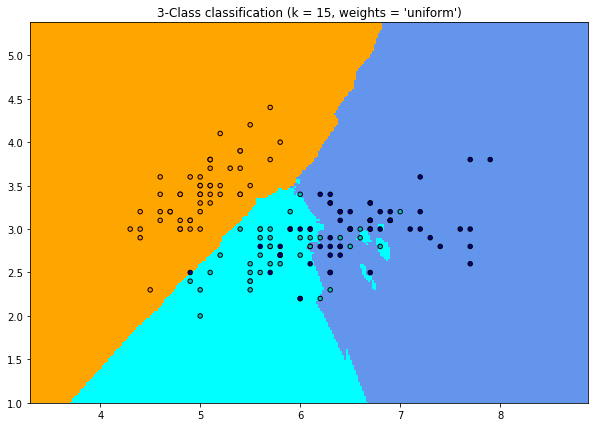

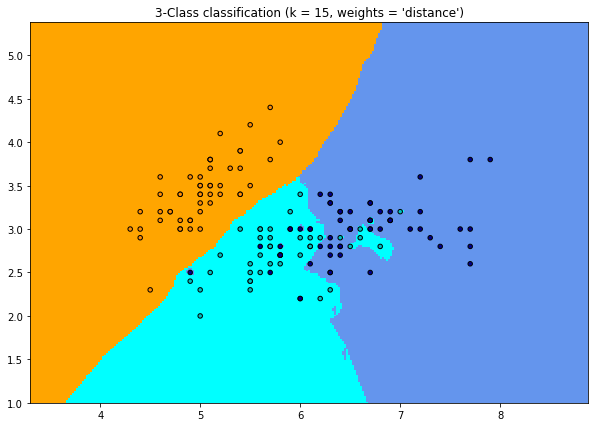

In [ ]:
# Number of neighbours
n_neighbors = 15

# Step size in the mesh
h = 0.02

# Create color Maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # We create an instance of Neighbours Classifier and fit the data
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary
    # For that, we will assign a color to each Point in the mesh [x_min, x_max],[y_min, y_max]
    # Take the endpoints of the X varible
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # Take the endpoints of the Y varible
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh so that we can easily see the classified results under different mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the values using the ravel function 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 7))
    # Plot the mesh grid
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)  

    # Plot the points used to train model
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    # Set the X limits
    plt.xlim(xx.min(), xx.max())
    # Set the y limits
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

The above figure shows that the model is able to classify the points based on the chosen Irises and the colormesh we have created.

#### Additional Reading
You can read this <a href="https://blog.quantinsti.com/machine-learning-k-nearest-neighbors-knn-algorithm-python/" target="_blank">article</a> to create a trading strategy using K-Nearest Neighbors (KNN) algorithm.
<br><br>